In [1]:
"""
Given the following dataset, can you identify the top 3 performing ad groups? 
Explain how you evaluated the ad groups.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
data = pd.read_csv('./data/ads_table.csv')
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1


In [3]:
data.shape

(2115, 7)

In [4]:
# Number of ads
len(data.ad.value_counts().index)

40

In [5]:
# Top Revenue
ad_rev = data.groupby('ad', sort=False)['total_revenue'].sum()
ad_rev.sort_values(ascending = False)[:10]

ad
ad_group_13    1054962.03
ad_group_18     522716.78
ad_group_4      381221.11
ad_group_20     280928.66
ad_group_26     275222.54
ad_group_37     251427.33
ad_group_34     213035.32
ad_group_5      185859.28
ad_group_12     129286.04
ad_group_2       94528.67
Name: total_revenue, dtype: float64

In [6]:
# Top Clicks
ad_clicks = data.groupby('ad', sort=False)['clicked'].sum()
ad_clicks.sort_values(ascending = False)[:10]

ad
ad_group_3     851886
ad_group_13    705941
ad_group_38    580290
ad_group_18    458621
ad_group_4     397757
ad_group_20    383486
ad_group_26    347642
ad_group_37    310855
ad_group_7     258094
ad_group_32    179180
Name: clicked, dtype: int64

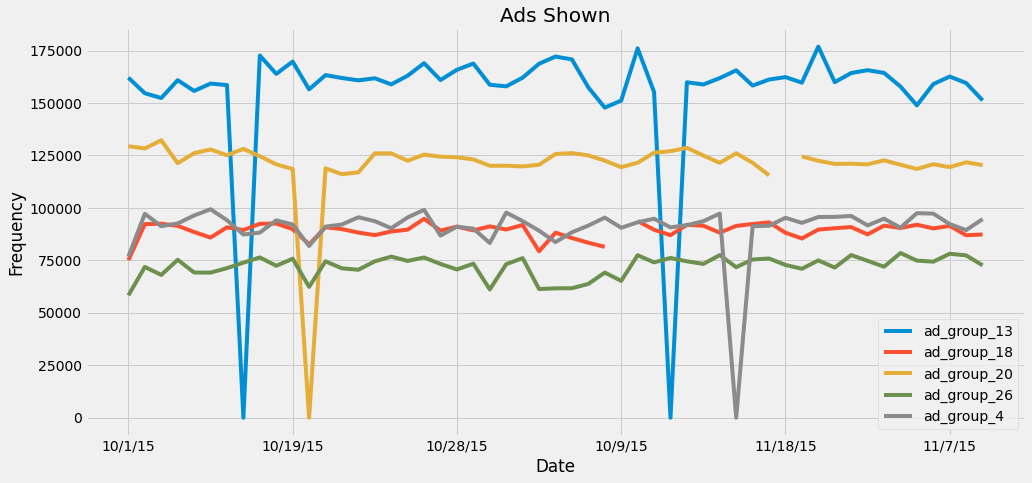

In [7]:
# Plot of groupbys
top_5 = ad_rev.sort_values(ascending = False)[:5].index
data_top_5 = data[(data.ad == top_5[0]) 
                  | (data.ad == top_5[1])
                  | (data.ad == top_5[2])
                  | (data.ad == top_5[3])
                  | (data.ad == top_5[4])
                 ]
fig, ax = plt.subplots(figsize = (15, 7))
data_top_5.groupby(['date', 'ad']).median()['shown'].unstack().plot(ax = ax)
plt.title('Ads Shown')
plt.ylabel('Frequency')
plt.xlabel('Date')
plt.legend(loc='lower right');

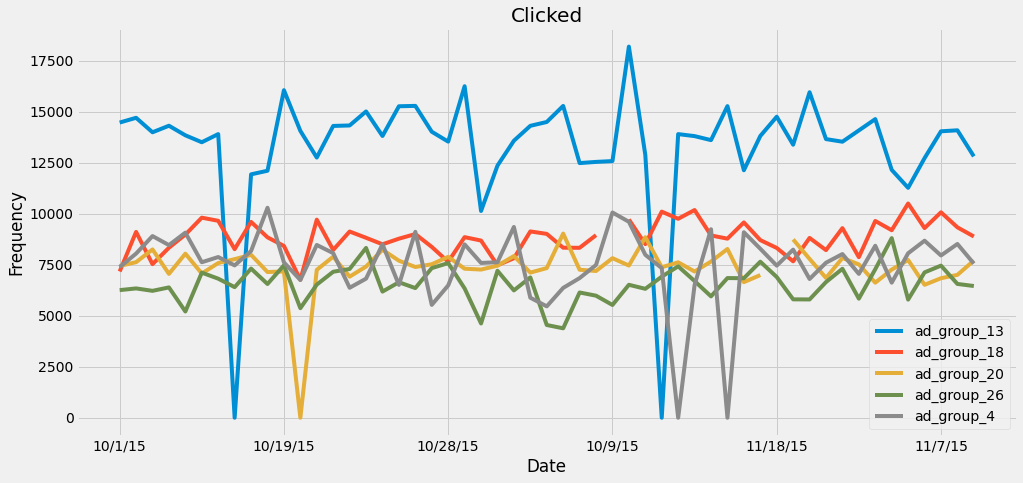

In [8]:
fig, ax = plt.subplots(figsize = (15, 7))
data_top_5.groupby(['date', 'ad']).median()['clicked'].unstack().plot(ax = ax)
plt.title('Clicked')
plt.ylabel('Frequency')
plt.xlabel('Date')
plt.legend(loc='lower right');

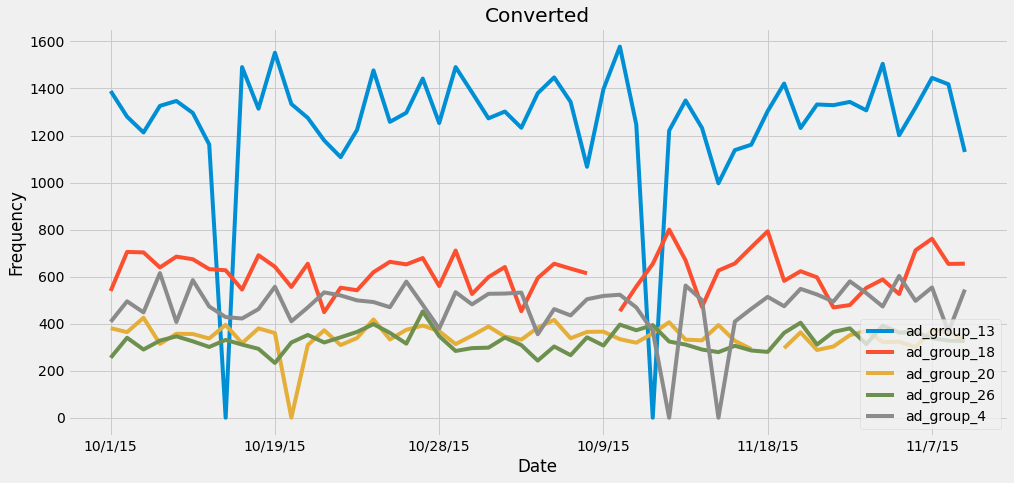

In [9]:
fig, ax = plt.subplots(figsize = (15, 7))
data_top_5.groupby(['date', 'ad']).median()['converted'].unstack().plot(ax = ax)
plt.title('Converted')
plt.ylabel('Frequency')
plt.xlabel('Date')
plt.legend(loc='lower right');

In [10]:
data['shown_click'] = data['clicked'] / data['shown']
data['click_convert'] = data['converted'] / data['clicked']
data['sc_cc_ratio'] = data['shown_click'] / data['click_convert']
data['shown_convert'] = data['converted'] / data['shown']

In [11]:
data.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,shown_click,click_convert,sc_cc_ratio,shown_convert
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1,0.035506,0.018384,1.931338,0.000653
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1,0.038372,0.015212,2.522437,0.000584
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1,0.032735,0.021185,1.545233,0.000693
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1,0.040582,0.018002,2.254299,0.000731
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1,0.039539,0.015208,2.599924,0.000601


In [12]:
# Top ads shown_click (first view)
ad_shown_click = data.groupby('ad', sort=False)['shown_click'].median()
ad_shown_click.sort_values(ascending = False)[:10]

ad
ad_group_18    0.098911
ad_group_19    0.096701
ad_group_3     0.093913
ad_group_26    0.090668
ad_group_28    0.088911
ad_group_32    0.088432
ad_group_7     0.086698
ad_group_13    0.086342
ad_group_4     0.083558
ad_group_34    0.083258
Name: shown_click, dtype: float64

In [13]:
# Top ads click_convert (second view)
ad_click_convert = data.groupby('ad', sort = False)['click_convert'].median()
ad_click_convert.sort_values(ascending = False)[:10]

ad
ad_group_2     0.102282
ad_group_13    0.095186
ad_group_12    0.091310
ad_group_16    0.088592
ad_group_34    0.087349
ad_group_31    0.087149
ad_group_14    0.083311
ad_group_18    0.072533
ad_group_5     0.063658
ad_group_4     0.062871
Name: click_convert, dtype: float64

In [14]:
# Top ads first:second ratio or shown_click attacts customers but no conversion 
ad_first_second = data.groupby('ad', sort = False)['sc_cc_ratio'].median()
ad_first_second.sort_values(ascending = False)[:10]

ad
ad_group_25          inf
ad_group_39    33.995225
ad_group_3     25.342567
ad_group_7     17.308569
ad_group_32    11.295939
ad_group_38     8.957002
ad_group_35     6.551912
ad_group_29     4.367142
ad_group_19     3.715883
ad_group_28     2.881724
Name: sc_cc_ratio, dtype: float64

In [15]:
# Top ads first:second ratio minimum or click_convert attacts customers with not much shown_click 
ad_first_second = data.groupby('ad', sort = False)['sc_cc_ratio'].median()
ad_first_second.sort_values(ascending = True)[:10]

ad
ad_group_31    0.058451
ad_group_36    0.179236
ad_group_21    0.180708
ad_group_2     0.219871
ad_group_27    0.263116
ad_group_16    0.288643
ad_group_14    0.369180
ad_group_15    0.477864
ad_group_9     0.492999
ad_group_40    0.605134
Name: sc_cc_ratio, dtype: float64